In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import spacy
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [50]:
data_frame = pd.read_csv('IMDB Dataset.csv')
data_frame

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [51]:
df = data_frame.copy()

In [52]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [53]:
df.shape

(50000, 2)

In [54]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [55]:
df.duplicated().sum()

418

In [56]:
duplicated_rows = df[df.duplicated()]
duplicated_rows

review sentiment
3537   Quite what the producers of this appalling ada...  negative
3769   My favourite police series of all time turns t...  positive
4391   Beautiful film, pure Cassavetes style. Gena Ro...  positive
6352   If you liked the Grinch movie... go watch that...  negative
6479   I want very much to believe that the above quo...  negative
...                                                  ...       ...
49912  This is an incredible piece of drama and power...  positive
49950  This was a very brief episode that appeared in...  negative
49984  Hello it is I Derrick Cannon and I welcome you...  negative
49986  This movie is a disgrace to the Major League F...  negative
49991  Les Visiteurs, the first movie about the medie...  negative

[418 rows x 2 columns]

In [57]:
df = df.drop_duplicates()

In [58]:
df['sentiment'].value_counts()

sentiment
positive    24884
negative    24698
Name: count, dtype: int64

In [59]:
df.shape

(49582, 2)

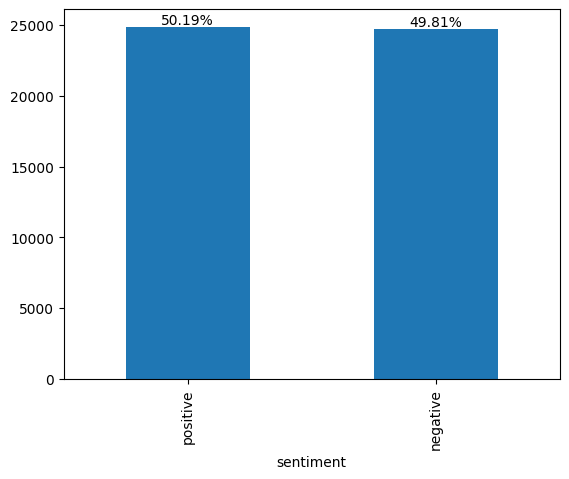

In [60]:
ax = df['sentiment'].value_counts().plot(kind='bar')
for rect in ax.patches:
    x = rect.get_x() + rect.get_width() / 2
    y = rect.get_height()
    text = '{:.2f}%'.format(y / len(df) * 100)
    ax.text(x, y, text, ha='center', va='bottom', fontsize=10, color='black')
plt.show()

In [61]:
#text preprocessing
def lower_case(txt):
    return (txt.lower())
    
df['review'] = df['review'].apply(lower_case)

In [62]:
df['review']

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 49582, dtype: object

In [63]:
#word tokenization
def tokenize_words(sentences):
    for sentence in sentences:
        yield(simple_preprocess(str(sentence), deacc=True))

In [64]:
data = df['review'].tolist()[:500]

In [65]:
data_words = list(tokenize_words(data))

In [66]:
data_words[:1]

[['one',
  'of',
  'the',
  'other',
  'reviewers',
  'has',
  'mentioned',
  'that',
  'after',
  'watching',
  'just',
  'oz',
  'episode',
  'you',
  'll',
  'be',
  'hooked',
  'they',
  'are',
  'right',
  'as',
  'this',
  'is',
  'exactly',
  'what',
  'happened',
  'with',
  'me',
  'br',
  'br',
  'the',
  'first',
  'thing',
  'that',
  'struck',
  'me',
  'about',
  'oz',
  'was',
  'its',
  'brutality',
  'and',
  'unflinching',
  'scenes',
  'of',
  'violence',
  'which',
  'set',
  'in',
  'right',
  'from',
  'the',
  'word',
  'go',
  'trust',
  'me',
  'this',
  'is',
  'not',
  'show',
  'for',
  'the',
  'faint',
  'hearted',
  'or',
  'timid',
  'this',
  'show',
  'pulls',
  'no',
  'punches',
  'with',
  'regards',
  'to',
  'drugs',
  'sex',
  'or',
  'violence',
  'its',
  'is',
  'hardcore',
  'in',
  'the',
  'classic',
  'use',
  'of',
  'the',
  'word',
  'br',
  'br',
  'it',
  'is',
  'called',
  'oz',
  'as',
  'that',
  'is',
  'the',
  'nickname',
  'gi

In [67]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) 
# higher threshold fewer phrases.
print('bigram',bigram)
print('bigram data',bigram[data_words])
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
print('trigram',trigram)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
bigram_mod.save("bigram_mod")
trigram_mod.save("trigram_mod")
bigram_mod = gensim.models.Phrases.load("bigram_mod")
trigram_mod = gensim.models.Phrases.load("trigram_mod")

bigram Phrases<81680 vocab, min_count=5, threshold=100, max_vocab_size=40000000>
bigram data <gensim.interfaces.TransformedCorpus object at 0x7fa8c20259c0>
trigram Phrases<81801 vocab, min_count=5, threshold=100, max_vocab_size=40000000>


In [68]:
for bigram in bigram_mod.phrasegrams.keys():
    print(bigram)

serial_killer
new_york
ve_seen
at_least
low_budget
year_old
reminds_me
ever_seen
high_school
special_effects
character_development
subject_matter
civil_war
cold_mountain
halfway_through
second_half
fast_forward
hong_kong
each_other
my_opinion
found_myself
years_ago
small_town
theme_song
rock_roll
star_trek
sit_through
sci_fi
huge_fan
jane_austen
anne_rice
new_world
pretty_woman
jackie_chan
throw_momma
gentleman_jim
ghost_stories
skeleton_dance
miss_dunne
bug_life


In [69]:
for trigram in trigram_mod.phrasegrams.keys():
    print(trigram)

serial_killer
looking_forward
ve_seen
at_least
low_budget
year_old
reminds_me
ever_seen
high_school
special_effects
character_development
subject_matter
civil_war
cold_mountain
second_half
fast_forward
each_other
my_opinion
in_my_opinion
found_myself
years_ago
small_town
theme_song
rock_roll
sit_through
huge_fan
jane_austen
anne_rice
new_world
pretty_woman
jackie_chan
throw_momma
gentleman_jim
ghost_stories
skeleton_dance
miss_dunne
bug_life


In [70]:
my_stop_words = STOPWORDS.union(set(['br']))
# Define functions for stopwords, bigrams, trigrams and lemmatisation
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in my_stop_words] for doc in texts]

In [71]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [72]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)
data_words_nostops

[['reviewers',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'trust',
  'faint',
  'hearted',
  'timid',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'aryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  'far',
  'away',
  'main',
  'appeal',
  'fact',
  'goes',
  'shows',
  'wouldn',
  'dar

In [73]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_bigrams

[['reviewers',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'trust',
  'faint',
  'hearted',
  'timid',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'aryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  'far',
  'away',
  'main',
  'appeal',
  'fact',
  'goes',
  'shows',
  'wouldn',
  'dar

In [74]:
# Form Bigrams
data_words_trigrams = make_trigrams(data_words_bigrams)
data_words_trigrams

[['reviewers',
  'mentioned',
  'watching',
  'oz',
  'episode',
  'll',
  'hooked',
  'right',
  'exactly',
  'happened',
  'thing',
  'struck',
  'oz',
  'brutality',
  'unflinching',
  'scenes',
  'violence',
  'set',
  'right',
  'word',
  'trust',
  'faint',
  'hearted',
  'timid',
  'pulls',
  'punches',
  'regards',
  'drugs',
  'sex',
  'violence',
  'hardcore',
  'classic',
  'use',
  'word',
  'called',
  'oz',
  'nickname',
  'given',
  'oswald',
  'maximum',
  'security',
  'state',
  'penitentary',
  'focuses',
  'mainly',
  'emerald',
  'city',
  'experimental',
  'section',
  'prison',
  'cells',
  'glass',
  'fronts',
  'face',
  'inwards',
  'privacy',
  'high',
  'agenda',
  'em',
  'city',
  'home',
  'aryans',
  'muslims',
  'gangstas',
  'latinos',
  'christians',
  'italians',
  'irish',
  'scuffles',
  'death',
  'stares',
  'dodgy',
  'dealings',
  'shady',
  'agreements',
  'far',
  'away',
  'main',
  'appeal',
  'fact',
  'goes',
  'shows',
  'wouldn',
  'dar

In [75]:
for id, i in enumerate(data_words_trigrams):
    for idx, j in enumerate(i):
        if "_" in j:
            print(id, idx, j)

2 24 serial_killer
4 35 new_york
8 4 looking_forward
8 9 ve_seen
10 18 low_budget
11 44 year_old
15 9 ve_seen
15 12 high_school
16 40 special_effects
17 11 character_development
20 90 serial_killer
26 7 serial_killer
26 83 serial_killer
26 111 subject_matter
29 31 civil_war
29 33 cold_mountain
29 43 cold_mountain
29 62 cold_mountain
29 63 civil_war
29 82 cold_mountain
29 116 cold_mountain
29 291 cold_mountain
33 311 second_half
34 41 fast_forward
34 88 ve_seen
36 12 serial_killer
41 23 hong_kong
41 85 hong_kong
45 1 ve_seen
51 155 new_york
51 178 new_york
52 3 low_budget
58 113 year_old
58 148 new_york
58 266 second_half
59 6 years_ago
61 9 character_development
64 33 ve_seen
65 19 small_town
65 84 subject_matter
66 165 special_effects
69 50 special_effects
69 66 high_school
69 106 year_old
71 32 subject_matter
74 39 special_effects
75 56 theme_song
82 13 ve_seen
82 17 ve_seen
82 22 ve_seen
83 63 second_half
87 8 ve_seen
87 48 ve_seen
91 1 ve_seen
95 19 new_york
101 32 ve_seen
101 80 r

In [76]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [77]:
# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [78]:
print('data_lemmatized[:2]', data_lemmatized[:2])

data_lemmatized[:2] [['reviewer', 'mention', 'watch', 'episode', 'hook', 'right', 'exactly', 'happen', 'thing', 'strike', 'brutality', 'unflinche', 'scene', 'violence', 'set', 'right', 'word', 'trust', 'faint', 'hearted', 'timid', 'pull', 'punch', 'regard', 'drug', 'sex', 'violence', 'hardcore', 'classic', 'use', 'word', 'call', 'nickname', 'give', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focus', 'mainly', 'section', 'prison', 'cell', 'glass', 'front', 'face', 'inward', 'privacy', 'high', 'agenda', 'aryan', 'italian', 'irish', 'scuffle', 'death', 'stare', 'dodgy', 'dealing', 'shady', 'agreement', 'far', 'away', 'main', 'appeal', 'fact', 'go', 'show', 'forget', 'pretty', 'picture', 'paint', 'mainstream', 'audience', 'forget', 'charm', 'forget', 'romance', 'mess', 'episode', 'see', 'strike', 'nasty', 'surreal', 'ready', 'watch', 'develop', 'taste', 'get', 'accustom', 'high', 'level', 'graphic', 'violence', 'violence', 'injustice', 'crook', 'guard', 'sell', 'nickel', 'inm

In [79]:
def getWordCloud(hashtags):
    # Read the whole text.
    text = ' '.join(hashtags)
    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig('wordcloud_all.pdf', dpi=500)
    plt.show()

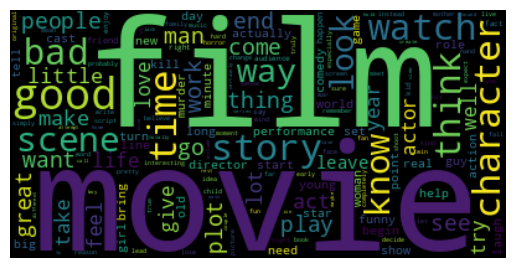

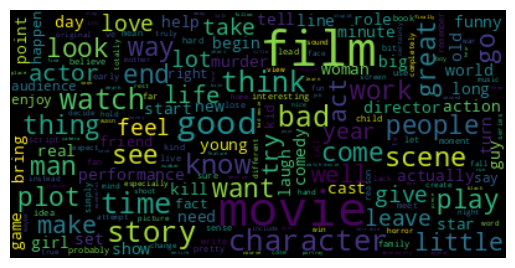

In [80]:
s = []
for l in data_lemmatized:
    t = ' '.join(l)
    s.append(t)
getWordCloud(s)

In [81]:
text_data = s
text_data

['reviewer mention watch episode hook right exactly happen thing strike brutality unflinche scene violence set right word trust faint hearted timid pull punch regard drug sex violence hardcore classic use word call nickname give oswald maximum security state penitentary focus mainly section prison cell glass front face inward privacy high agenda aryan italian irish scuffle death stare dodgy dealing shady agreement far away main appeal fact go show forget pretty picture paint mainstream audience forget charm forget romance mess episode see strike nasty surreal ready watch develop taste get accustom high level graphic violence violence injustice crook guard sell nickel inmate kill order away mannered middle class inmate turn prison bitch lack street skill prison experience watch comfortable uncomfortable viewing s touch darker',
 'wonderful little production filming technique unassume old time fashion give comfort discomforting sense realism entire piece actor extremely choose get polari

In [82]:
len(text_data)

500

In [83]:
#models
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_data, df['sentiment'][:500], test_size=0.30, random_state=42)

In [84]:
len(X_train)

350

In [85]:
len(y_train)

350

In [86]:
# Vectorize the text data using CountVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_matrix = tfidf_vectorizer.fit_transform(X_train)
X_test_matrix = tfidf_vectorizer.transform(X_test)

In [87]:
X_train_matrix.shape

(350, 6787)

In [88]:
tfidf_df = pd.DataFrame(X_train_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [89]:
tfidf_df.head(10)

aaliyah  abandon  abbot  abbreviate  abedded  abet  abhorrent  abide  \
0      0.0      0.0    0.0         0.0      0.0   0.0        0.0    0.0   
1      0.0      0.0    0.0         0.0      0.0   0.0        0.0    0.0   
2      0.0      0.0    0.0         0.0      0.0   0.0        0.0    0.0   
3      0.0      0.0    0.0         0.0      0.0   0.0        0.0    0.0   
4      0.0      0.0    0.0         0.0      0.0   0.0        0.0    0.0   
5      0.0      0.0    0.0         0.0      0.0   0.0        0.0    0.0   
6      0.0      0.0    0.0         0.0      0.0   0.0        0.0    0.0   
7      0.0      0.0    0.0         0.0      0.0   0.0        0.0    0.0   
8      0.0      0.0    0.0         0.0      0.0   0.0        0.0    0.0   
9      0.0      0.0    0.0         0.0      0.0   0.0        0.0    0.0   

   ability  abject  ...  zellweger  zero  zinger  zip  zoey    zombie  zone  \
0      0.0     0.0  ...        0.0   0.0     0.0  0.0   0.0  0.000000   0.0   
1      0.0     0.0  ...        0.0   0.0     0.0  0.0   0.0  0.000000   0.0   
2      0.0     0.0  ...        0.0   0.0     0.0  0.0   0.0  0.000000   0.0   
3      0.0     0.0  ...        0.0   0.0     0.0  0.0   0.0  0.000000   0.0   
4      0.0     0.0  ...        0.0   0.0     0.0  0.0   0.0  0.000000   0.0   
5      0.0     0.0  ...        0.0   0.0     0.0  0.0   0.0  0.000000   0.0   
6      0.0     0.0  ...        0.0   0.0     0.0  0.0   0.0  0.136991   0.0   
7      0.0     0.0  ...        0.0   0.0     0.0  0.0   0.0  0.000000   0.0   
8      0.0     0.0  ...        0.0   0.0     0.0  0.0   0.0  0.000000   0.0   
9      0.0     0.0  ...        0.0   0.0     0.0  0.0   0.0  0.000000   0.0   

   zoom  zucker  zulu  
0   0.0     0.0   0.0  
1   0.0     0.0   0.0  
2   0.0     0.0   0.0  
3   0.0     0.0   0.0  
4   0.0     0.0   0.0  
5   0.0     0.0   0.0  
6   0.0     0.0   0.0  
7   0.0     0.0   0.0  
8   0.0     0.0   0.0  
9   0.0     0.0   0.0  

[10 rows x 6787 columns]

In [90]:
traditional_machine_learning_models = {
    'Naive Bayes': MultinomialNB(),
    'Support Vector Machines': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [91]:
# Evaluation metrics
def accuracy_measure(y_test, y_pred):
    return(format(accuracy_score(y_test, y_pred), '.4f'))

def classification_report_metric(y_test, y_pred):
    return(classification_report(y_test, y_pred))

def confusion_matrix_metric(y_test, y_pred):
    return(confusion_matrix(y_test, y_pred))

In [92]:
def train_model(name, model):
    evaluation_metrics = {}
    evaluation_metrics['name'] = name
    print(f"\n\n********** Training {name} **********")
    model.fit(X_train_matrix, y_train)
    y_pred = model.predict(X_test_matrix)
    evaluation_metrics['accuracy_score'] = accuracy_measure(y_test, y_pred)
    evaluation_metrics['classification_report'] = classification_report_metric(y_test, y_pred)
    evaluation_metrics['confusion_matrix'] = confusion_matrix_metric(y_test, y_pred)
    print(f"********** Evaluating {name} **********")
    for metric, value in evaluation_metrics.items():
        print(metric, ':\n', value, '\n')
    return (evaluation_metrics)

In [93]:
model_evaluations = []
for name, model in traditional_machine_learning_models.items():
    model_evaluations.append(train_model(name, model))



********** Training Naive Bayes **********
********** Evaluating Naive Bayes **********
name :
 Naive Bayes 

accuracy_score :
 0.6400 

classification_report :
               precision    recall  f1-score   support

    negative       0.58      0.96      0.72        73
    positive       0.90      0.34      0.49        77

    accuracy                           0.64       150
   macro avg       0.74      0.65      0.61       150
weighted avg       0.74      0.64      0.60       150
 

confusion_matrix :
 [[70  3]
 [51 26]] 



********** Training Support Vector Machines **********
********** Evaluating Support Vector Machines **********
name :
 Support Vector Machines 

accuracy_score :
 0.7467 

classification_report :
               precision    recall  f1-score   support

    negative       0.67      0.96      0.79        73
    positive       0.93      0.55      0.69        77

    accuracy                           0.75       150
   macro avg       0.80      0.75      0.74     

In [94]:
pd.DataFrame([(model['name'], model['accuracy_score']) for model in model_evaluations], columns=['name','accuracy_score'])

name accuracy_score
0              Naive Bayes         0.6400
1  Support Vector Machines         0.7467
2      Logistic Regression         0.7600
3            Decision Tree         0.6200
4            Random Forest         0.7333

In [97]:
def classification_report_to_df(report):
    report_data = []
    lines = [line.strip() for line in report.split('\n') if line.strip()]
    for i, line in enumerate(lines):
        if i == 0:
            continue
        words = [word.strip() for word in line.split('  ') if word]
    
        if len(words) < 5:
            words.append(words[1])
            words.append(words[2])
            words[1] = words[2] = ''
    
        report_data.append(words)
    data = pd.DataFrame([words[1:] for words in report_data], columns=['Precision', 'Recall', 'F1-Score', 'Support'], index=[words[0] for words in report_data])
    return(data)

In [98]:
class_report = [classification_report_to_df(report['classification_report']) for report in model_evaluations]
class_report_df = pd.concat(class_report, keys=[model['name'] for model in model_evaluations])
class_report_df

Precision Recall F1-Score Support
Naive Bayes             negative          0.58   0.96     0.72      73
                        positive          0.90   0.34     0.49      77
                        accuracy                          0.64     150
                        macro avg         0.74   0.65     0.61     150
                        weighted avg      0.74   0.64     0.60     150
Support Vector Machines negative          0.67   0.96     0.79      73
                        positive          0.93   0.55     0.69      77
                        accuracy                          0.75     150
                        macro avg         0.80   0.75     0.74     150
                        weighted avg      0.80   0.75     0.74     150
Logistic Regression     negative          0.69   0.93     0.79      73
                        positive          0.90   0.60     0.72      77
                        accuracy                          0.76     150
                        macro avg         0.79   0.76     0.75     150
                        weighted avg      0.80   0.76     0.75     150
Decision Tree           negative          0.61   0.59     0.60      73
                        positive          0.62   0.65     0.64      77
                        accuracy                          0.62     150
                        macro avg         0.62   0.62     0.62     150
                        weighted avg      0.62   0.62     0.62     150
Random Forest           negative          0.66   0.92     0.77      73
                        positive          0.88   0.56     0.68      77
                        accuracy                          0.73     150
                        macro avg         0.77   0.74     0.73     150
                        weighted avg      0.77   0.73     0.73     150

In [99]:
def plot_confusion_matrix(model, ax):
    disp = ConfusionMatrixDisplay(confusion_matrix=model['confusion_matrix'], display_labels=['Negative', 'Positive'])
    ax.set_title(f"{model['name']} Confusion Matrix")
    disp.plot(ax=ax)

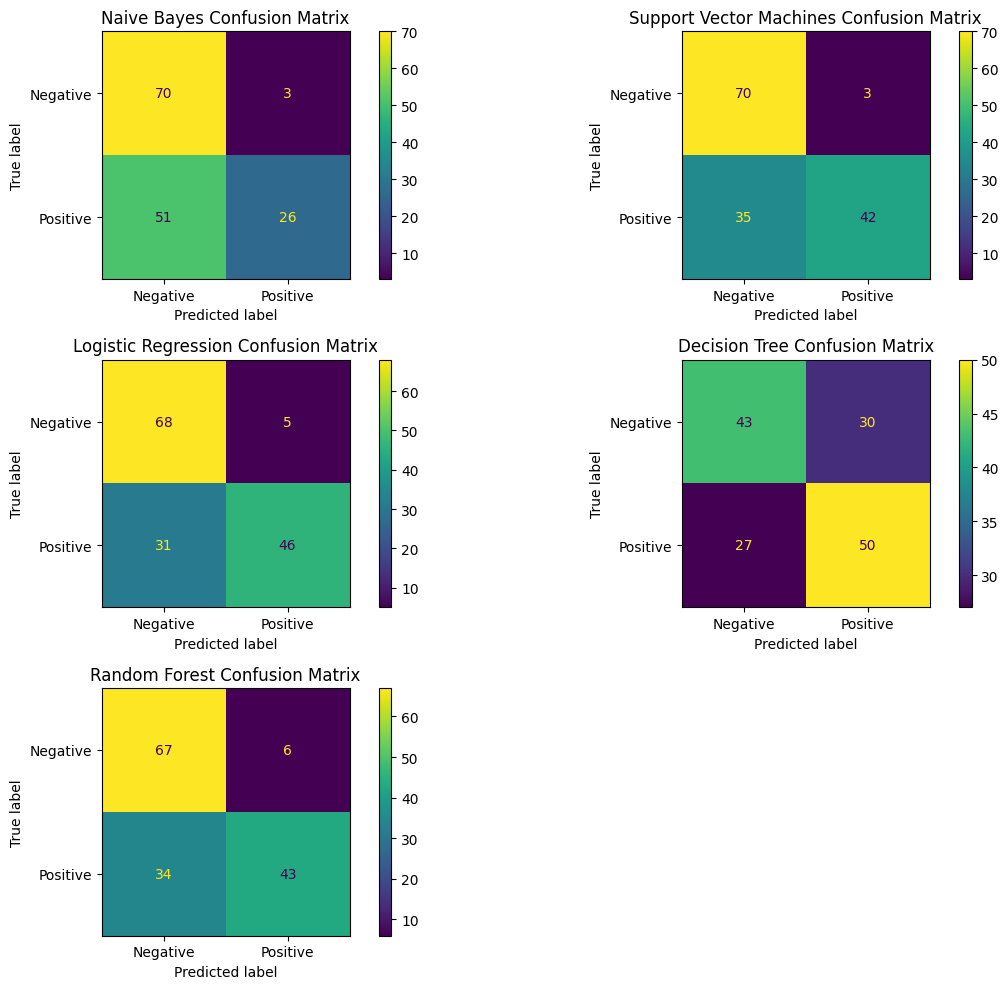

In [100]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for i, (model, ax) in enumerate(zip(model_evaluations[:5], axes.flatten())):
    plot_confusion_matrix(model, ax)
for ax in axes.flatten()[len(model_evaluations):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [108]:
model1 = MultinomialNB()
model1.fit(X_train_matrix, y_train)
y_pred = model1.predict(X_test_matrix)

y_prob = model1.predict_proba(X_test_matrix)[:, 1]

In [109]:
y_prob

array([0.19825442, 0.41087884, 0.51619036, 0.3631098 , 0.3689073 ,
       0.49061469, 0.46324726, 0.53135963, 0.42294285, 0.49965254,
       0.45817585, 0.32934346, 0.35794572, 0.19520438, 0.46589377,
       0.43488168, 0.30340177, 0.52896078, 0.44149929, 0.23083278,
       0.43949116, 0.58321461, 0.50447466, 0.42993269, 0.47512014,
       0.37937402, 0.33383858, 0.20950705, 0.31824883, 0.5020857 ,
       0.25736136, 0.52638579, 0.21416981, 0.54058043, 0.41163662,
       0.40430948, 0.56548472, 0.37628104, 0.36820165, 0.36456397,
       0.40366752, 0.63319792, 0.3439413 , 0.22418419, 0.41371928,
       0.19430709, 0.36255917, 0.52265106, 0.2349896 , 0.40131511,
       0.30659566, 0.40884958, 0.37738301, 0.51696075, 0.49901326,
       0.25316431, 0.35161062, 0.42282179, 0.2967309 , 0.35772445,
       0.49376718, 0.21489585, 0.42966014, 0.44013893, 0.36750368,
       0.40040649, 0.39687316, 0.45077017, 0.53312869, 0.40984118,
       0.1741092 , 0.40444309, 0.48971981, 0.3705001 , 0.46905

In [111]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode true labels ('negative' and 'positive') into binary values (0 and 1)
y_true_encoded = label_encoder.fit_transform(y_test)

# Now, y_true_encoded contains binary labels (0 and 1) suitable for roc_curve
fpr, tpr, thresh = roc_curve(y_true_encoded, y_prob)
roc_auc = auc(fpr, tpr)

In [115]:
roc_auc

0.8824052659669098